In [30]:
import mlflow
mlflow.set_tracking_uri("http://ec2-13-211-98-126.ap-southeast-2.compute.amazonaws.com:5000/")
with mlflow.start_run():
    mlflow.log_param("param1", 24)
    mlflow.log_metric("metric1", 0.389)

🏃 View run honorable-hog-402 at: http://ec2-13-211-98-126.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/686491804147444376/runs/5aff2872e70541539a0566c2616f11b8
🧪 View experiment at: http://ec2-13-211-98-126.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/686491804147444376


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()
     

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)


In [5]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RadhikaMaheshwari\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RadhikaMaheshwari\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Define preprocessing function
def preprocess_comment(comment):
    comment = comment.lower()
    comment = comment.strip()
    # Remove newline characters
    comment = re.sub(r'\n', ' ', comment)

    # Remove non alphanumeric characters except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stop words but retain the important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'yet', 'no'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the word
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment


In [12]:
# Apply the preprocessing cuntion to the clean_comment column
df['clean_comment'] = df['clean_comment'].apply(preprocess_comment)

In [17]:
df['clean_comment'].dropna(inplace=True)

In [18]:
df.isna().sum()

clean_comment    0
category         0
dtype: int64

In [9]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [10]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Let us perform train test split
X = df['clean_comment']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state = 42,
                                                    stratify = y ) # To ensure balanced splits


In [12]:
# Step 1: Vectorize the comments using bag of words CountVectorizer
vectorizer = CountVectorizer(max_features = 10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [13]:
# Set Random Forest Parameters
n_estimators = 200
max_depth = 15

# Train the model
model = RandomForestClassifier(n_estimators = n_estimators,
                                max_depth = max_depth,
                                random_state = 42)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [14]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

In [15]:
classification_rep_test = classification_report(y_test, y_pred_test, output_dict = True)

In [16]:
classification_rep_test

{'-1': {'precision': 0.9411764705882353,
  'recall': 0.007755695588948134,
  'f1-score': 0.015384615384615385,
  'support': 2063.0},
 '0': {'precision': 0.6810433884297521,
  'recall': 0.8258690886313812,
  'f1-score': 0.7464968152866241,
  'support': 3193.0},
 '1': {'precision': 0.6303201506591337,
  'recall': 0.8488460563023079,
  'f1-score': 0.7234410461471955,
  'support': 3943.0},
 'accuracy': 0.6522448092183933,
 'macro avg': {'precision': 0.7508466698923737,
  'recall': 0.5608236135075457,
  'f1-score': 0.49510749227281164,
  'support': 9199.0},
 'weighted avg': {'precision': 0.7176400643688109,
  'recall': 0.6522448092183933,
  'f1-score': 0.5726525532891666,
  'support': 9199.0}}

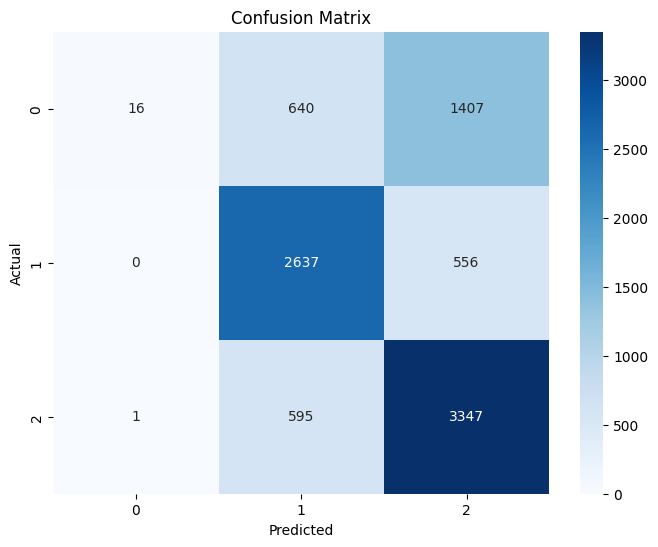

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")

In [22]:
df.iloc[287,:]

clean_comment     
category         0
Name: 288, dtype: object

In [23]:
df = df[df['clean_comment'].str.strip() != '']  # Remove empty strings
df = df.dropna(subset=['clean_comment']) 

In [24]:
# Save the data as csv file
df.to_csv("cleaned_dataset.csv", index = False)

In [19]:
print(accuracy_train)

0.6610495035152569


In [20]:
print(accuracy_test)

0.6522448092183933


In [21]:
print(classification_report(y_test, y_pred_test,))

              precision    recall  f1-score   support

          -1       0.94      0.01      0.02      2063
           0       0.68      0.83      0.75      3193
           1       0.63      0.85      0.72      3943

    accuracy                           0.65      9199
   macro avg       0.75      0.56      0.50      9199
weighted avg       0.72      0.65      0.57      9199



In [79]:
mlflow.set_experiment("Exp1_Random Forest Baseline")

2025/10/14 12:58:47 INFO mlflow.tracking.fluent: Experiment with name 'Exp1_Random Forest Baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://sentiment-mlops-bucket-s3/366990793208141387', creation_time=1760407127883, experiment_id='366990793208141387', last_update_time=1760407127883, lifecycle_stage='active', name='Exp1_Random Forest Baseline', tags={}>

In [ ]:
# Configure AWS Credentials

In [ ]:
import os

# Set AWS credentials as environment variables
os.environ['AWS_ACCESS_KEY_ID'] = ''
os.environ['AWS_SECRET_ACCESS_KEY'] = ''
os.environ['AWS_DEFAULT_REGION'] = 'ap-southeast-2'

# No need for !aws configure anymore

In [86]:
with mlflow.start_run() as run:

    # Log a description for run
    mlflow.set_tag('mlflow.runName', "RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag('experiment_type', 'baseline')
    mlflow.set_tag('model_type', 'RandomForestClassifier')
    mlflow.set_tag("description", "Baseline Randome Forest Classifier for sentiment analysis using Bag of Words and simple train test split")
    
    
    # Log Params for Vectorizer
    mlflow.log_param("vectorizer_type", "Count Vectorizer")
    mlflow.log_param("vectorizer_max_features", vectorizer.max_features)


    # Log Random Forest Classifier parameters
    mlflow.log_param('n_estimators', n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Log metrics
    mlflow.log_metric("Accuracy Score Train", accuracy_train)
    mlflow.log_metric("Accuracy Score Test", accuracy_test)

    for label, metrics in classification_rep_test.items():
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                mlflow.log_metric(f'{label}_{metric}', value)
    
    # Save the confusion matrix plot
    mlflow.log_artifact("confusion_matrix.png")
    
    mlflow.sklearn.log_model(model, name = "rm", registered_model_name = 'rm1')

    # Log the dataset to mlflow
    mlflow.log_artifact("dataset.csv")
    



2025/10/14 13:07:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/14 13:07:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'rm1' already exists. Creating a new version of this model...
2025/10/14 13:07:05 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: rm1, version 2
Created version '2' of model 'rm1'.


🏃 View run RandomForest_Baseline_TrainTestSplit at: http://ec2-13-211-98-126.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/366990793208141387/runs/1c4ca9b62d024c699a692b8fc9ec9061
🧪 View experiment at: http://ec2-13-211-98-126.ap-southeast-2.compute.amazonaws.com:5000/#/experiments/366990793208141387


In [87]:
# Search for the logged model by name
from mlflow.tracking import MlflowClient

client = MlflowClient()

models = client.search_logged_models(filter_string = "name = 'rm'", experiment_ids = ['366990793208141387'])
model_id = models[0].model_id

In [88]:
models

[LoggedModel(artifact_location='s3://sentiment-mlops-bucket-s3/366990793208141387/models/m-76c80baee6e8473d8d801293d2ec63c0/artifacts', creation_timestamp=1760407608718, experiment_id='366990793208141387', last_updated_timestamp=1760407625634, model_id='m-76c80baee6e8473d8d801293d2ec63c0', model_type='', model_uri='models:/m-76c80baee6e8473d8d801293d2ec63c0', name='rm', source_run_id='1c4ca9b62d024c699a692b8fc9ec9061', status=<LoggedModelStatus.READY: 'READY'>, status_message=''),
 LoggedModel(artifact_location='s3://sentiment-mlops-bucket-s3/366990793208141387/models/m-67275219f5a04393ab3dccb088b4496f/artifacts', creation_timestamp=1760407146987, experiment_id='366990793208141387', last_updated_timestamp=1760407208911, model_id='m-67275219f5a04393ab3dccb088b4496f', model_type='', model_uri='models:/m-67275219f5a04393ab3dccb088b4496f', name='rm', source_run_id='4b6795c480b74a03a71431eae6cae38d', status=<LoggedModelStatus.READY: 'READY'>, status_message='')]

In [89]:
for rm in client.search_registered_models():
    print(rm.name)

print('--------')

# Search all registered model versions and match by model_id
for mv in client.search_model_versions():
    if getattr(mv, "model_id", None) == model_id:
        print(f"Registered model name: (mv.name), version: {mv.version}")

rm1
--------


In [92]:
# Get model info
model_info = client.get_model_version("rm1", 2)
print("Model source run ID:", model_info)

# Get S3 URI for the model
s3_uri = client.get_model_version_download_uri(model_info.name, model_info.version)
print("S3 URI:", s3_uri)

Model source run ID: <ModelVersion: aliases=[], creation_timestamp=1760407625758, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1760407625758, metrics=None, model_id=None, name='rm1', params=None, run_id='1c4ca9b62d024c699a692b8fc9ec9061', run_link='', source='models:/m-76c80baee6e8473d8d801293d2ec63c0', status='READY', status_message=None, tags={}, user_id='', version='2'>
S3 URI: s3://sentiment-mlops-bucket-s3/366990793208141387/models/m-76c80baee6e8473d8d801293d2ec63c0/artifacts
